In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-cleveland/Heart_disease_cleveland_new.csv


In [2]:
## Highest accuracy 86% Logistic Regression

In [3]:
df=pd.read_csv("/kaggle/input/heart-disease-cleveland/Heart_disease_cleveland_new.csv")

In [4]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


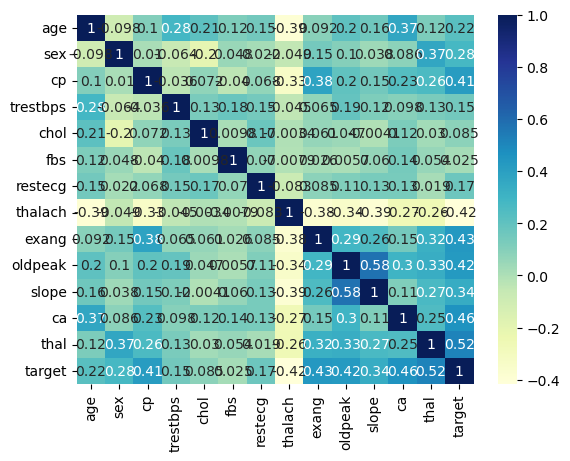

In [6]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap


In [7]:
X=df.iloc[:,0:13]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1


In [8]:
y=df['target']

In [9]:
y.value_counts() ## Concludes data is not much unbalanced

0    164
1    139
Name: target, dtype: int64

In [10]:
df.skew(axis = 0)

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.208791
thal        0.342673
target      0.166406
dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression(solver='lbfgs', max_iter=10000)
logModel.fit(X_train, y_train)
predictions = logModel.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

86.0

## LightGBM

In [13]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)*100))

LightGBM Model accuracy score: 82.0000


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred8 = clf.predict(X_test)
 # metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print( metrics.accuracy_score(y_test, y_pred8)*100)


82.0


## Extratree Classifier

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100,max_depth=6,min_samples_split=2,min_weight_fraction_leaf =0.0,n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test)*100)
y_pred9 = clf.predict(X_test)

86.0


## Xgboost

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy*100)

80.0


## ANN

In [17]:
from tensorflow.keras.models import Sequential #Helps to create Forward and backward propogation
from tensorflow.keras.layers import Dense #Helps to create neurons in ANN
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU #activation functions

In [18]:

classifier=Sequential()

In [19]:
classifier.add(Dense(units=11,activation='relu'))

In [20]:
classifier.add(Dense(units=7,activation='relu'))

In [21]:
classifier.add(Dense(units=6,activation='relu'))


In [22]:
## Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [23]:
classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])
#classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [24]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [25]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)
     

Epoch 1/1000
14/14 [==============================] - 1s 22ms/step - loss: 2.4924 - accuracy: 0.4485 - val_loss: 1.4435 - val_accuracy: 0.4328
Epoch 2/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.8932 - accuracy: 0.5735 - val_loss: 1.0175 - val_accuracy: 0.5373
Epoch 3/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.7089 - accuracy: 0.5735 - val_loss: 0.8153 - val_accuracy: 0.5224
Epoch 4/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.6755 - accuracy: 0.5809 - val_loss: 0.7687 - val_accuracy: 0.5373
Epoch 5/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.6604 - accuracy: 0.5662 - val_loss: 0.7592 - val_accuracy: 0.5373
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.6642 - accuracy: 0.5882 - val_loss: 0.7648 - val_accuracy: 0.5373
Epoch 7/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.6465 - accuracy: 0.5882 - val_loss: 0.7766 - val_accuracy: 0.5522
Epoch

In [26]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 1ms/step


In [27]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score*100

77.0